# Rotary Spectra - Test Case

A test case to check the validity of rotary spectra code, using falsified circular velocity data.

Using both Thomson and Gonella as a guideline, and referencing a seemingly unfinished code from GitHub, I beleive that I have everything correct, but the output seems wrong. I believe confusing notation in the sources is where I am making a mistake. Perhaps Jody, Rick, or Steve will be able to pick up on a mistake?

# Imports

In [93]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Create velocity data

Falsify circular, horizontal velocity data, in CCW direction.

In [94]:
r = 1                                          # radius of circle, m
d = 1000                                       # length of time series
t = np.linspace(0,2*np.pi,d)                   # total time for motion, s
dt = t[5]-t[4]                                 # time step size
fs = 1/dt
w = 1                                          # angular velocity, rad/s
u = -r*w*np.sin(w*t)                           # u velocity of particle
v = r*w*np.cos(w*t)                            # y velocity of particle

# Rotary spectra

Defines a function to return the CW, CCW, cross, and quadrature spectra for any u and v velocity vectors.

Based on Thomson, R. (1997). Data Analysis Methods in Physical Oceanography. pp.427-432,494-500; Gonella, J. (1972) Deep Sea Res. 833-846, and https://pyoceans.github.io/python-oceans/ocfis.html.

In [95]:
def spec_rot(u, v):
    fu, fv = list(map(np.fft.fft, (u, v)))             # individual components Fourier series
    pu = fu * np.conj(fu)                              # auto-spectra of the scalar components
    pv = fv * np.conj(fv)
    puv = fu.real * fv.real + fu.imag * fv.imag        # cross spectra
    quv = -fu.real * fv.imag + fv.real * fu.imag       # quadrature spectra
    cw = (pu + pv - (2*quv)) / 8                       # rotatory components
    ccw = (pu + pv + (2*quv)) / 8
    N = (1/2)*fs                                       # nyquist frequency
    F = np.linspace(0,N,d)                             # frequency range
    return puv, quv, cw, ccw, F

In [96]:
puv, quv, cw, ccw, f = spec_rot(u,v)                   # get rotary components (cw and ccw) and frequency range (f)

<IPython.core.display.Javascript object>


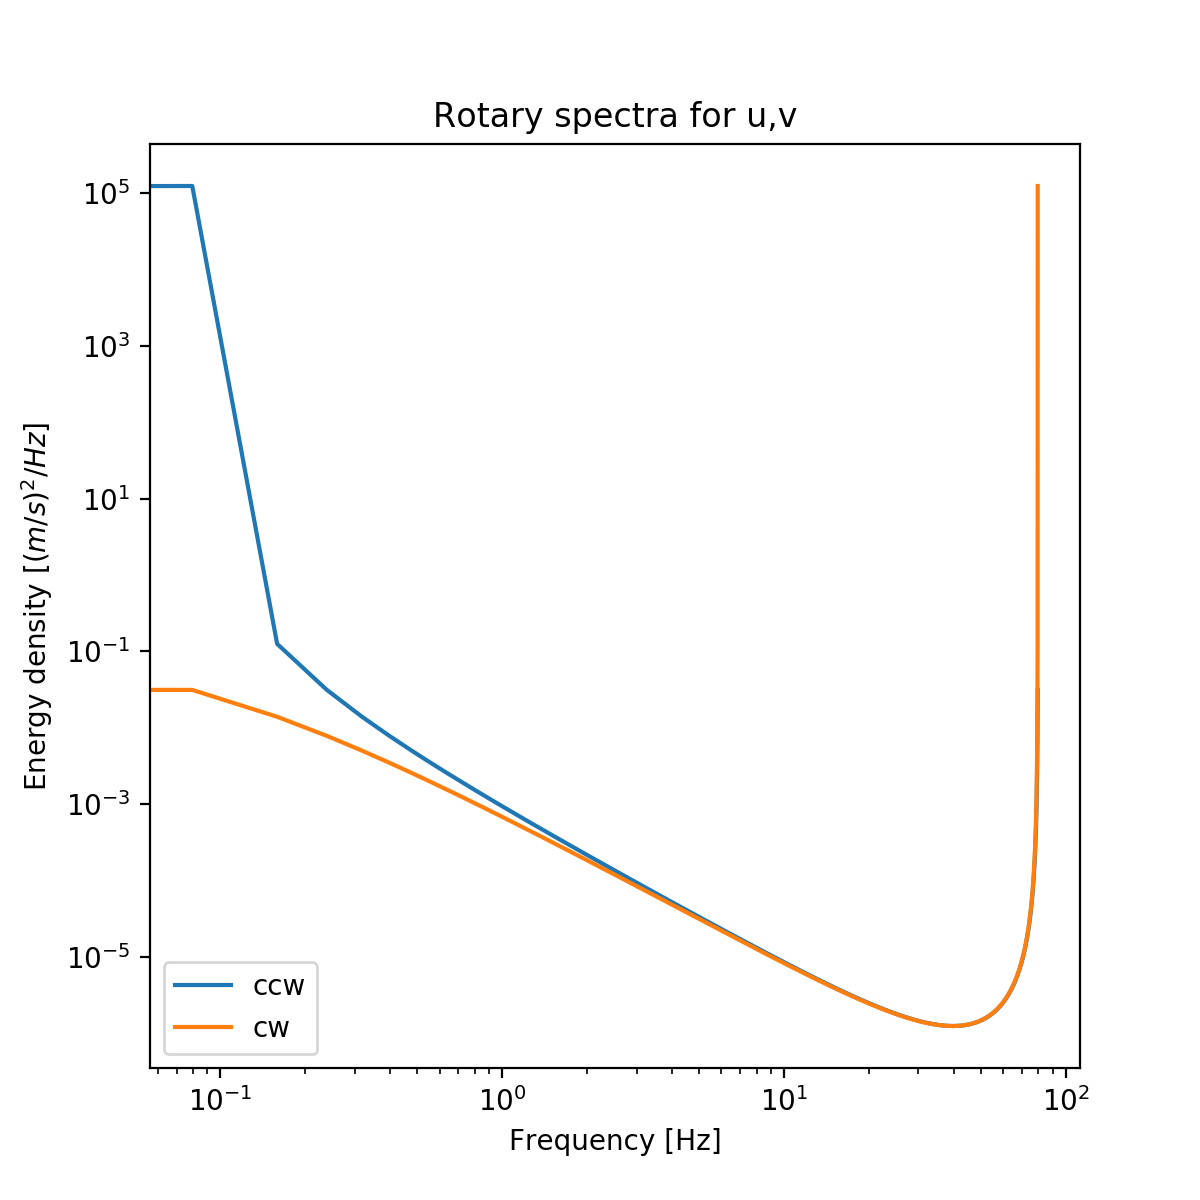

In [97]:
fig,ax = plt.subplots(1,1,figsize=(6,6))               # plot CCW and CW components
ax.loglog(f,ccw,label='ccw')
ax.loglog(f,cw,label='cw')
ax.set_title('Rotary spectra for u,v')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(f'Energy density [$(m/s)^2/Hz$]')
ax.legend()
plt.show()

## Questions

Shouldn't the CW components be zero, or negative, if the velocity is always CCW?

Is the Nyquist frequency the limiting frequency after all of these transformations? Gonella seems to say so, but I'm not sure that I interpreted it, correctly.